In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_excel("Sayantan Combine Data Set.xlsx")

In [4]:
data.head(5)

,PZ -REF,FP1-REF,FP2-REF,F7 -REF,F3 -REF,FZ -REF,F4 -REF,F8 -REF,T3 -REF,C3 -REF,...,C4 -REF,T4 -REF,T5 -REF,P3 -REF,P4 -REF,T6 -REF,O1 -REF,OZ -REF,O2 -REF,Class
0,NaN,2,-72,-6,-19,-26,-112,-52,-12,10,...,-10,12,28,-13,-7,4,30,-12,-14,Urge
1,4.0,-5,-80,-5,-22,-36,-131,-55,-14,10,...,-18,-1,24,-13,-12,7,29,-15,-10,Urge
2,-6.0,-10,-84,1,-20,-40,-145,-55,-11,16,...,-23,-12,26,-10,-14,9,29,-8,-7,Urge
3,-13.0,-9,-84,7,-14,-40,-154,-55,-7,22,...,-27,-21,28,-10,-15,10,27,5,-5,Urge
4,-18.0,-4,-82,11,-8,-36,-162,-57,-4,26,...,-32,-29,29,-12,-15,7,24,20,-6,Urge


In [5]:
data.dropna(inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
scaler=MinMaxScaler()
encoder=LabelEncoder()

X=data.iloc[:,:20].values
Y=data.iloc[:,20:].values

In [8]:
X

array([[   4.,   -5.,  -80., ...,   29.,  -15.,  -10.],
       [  -6.,  -10.,  -84., ...,   29.,   -8.,   -7.],
       [ -13.,   -9.,  -84., ...,   27.,    5.,   -5.],
       ...,
       [-108., -110.,   20., ...,  -62., -117., -170.],
       [-109., -108.,   17., ...,  -60., -131., -172.],
       [-107., -107.,   12., ...,  -58., -133., -174.]])

In [9]:
Y

array([['Urge'],
       ['Urge'],
       ['Urge'],
       ...,
       ['Satisfaction'],
       ['Satisfaction'],
       ['Satisfaction']], dtype=object)

In [10]:
Y=encoder.fit_transform(Y)

c:\Users\ROHIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
encoder.classes_

array(['Rage', 'Satisfaction', 'Urge'], dtype=object)

In [12]:
X=scaler.fit_transform(X)

In [13]:
X

array([[ 0.17590046,  0.04603644, -0.79882995, ...,  0.35563385,
        -0.03917823,  0.03847538],
       [ 0.08114533,  0.01106733, -0.84183179, ...,  0.35563385,
         0.01300439,  0.0451873 ],
       [ 0.01481675,  0.01806115, -0.84183179, ...,  0.34147632,
         0.10991496,  0.04966191],
       ...,
       [-0.88535691, -0.68831498,  0.27621595, ..., -0.288534  ,
        -0.79955348, -0.31949368],
       [-0.89483242, -0.67432733,  0.24396457, ..., -0.27437646,
        -0.90391871, -0.32396829],
       [-0.8758814 , -0.66733351,  0.19021228, ..., -0.26021893,
        -0.91882803, -0.32844291]])

In [14]:
X_Train,X_Test,Y_train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models=[LogisticRegression(multi_class='multinomial'),GaussianNB(),SVC(),KNeighborsClassifier(n_neighbors=4),DecisionTreeClassifier(criterion='entropy')]

In [16]:
model=LogisticRegression(multi_class='multinomial')

model.fit(X_Train,Y_train)

LogisticRegression(multi_class='multinomial')

In [17]:
model.classes_

array([0, 1, 2])

In [18]:
Y_Pred=model.predict(X_Test)

In [19]:
Y_Pred

array([0, 0, 0, ..., 0, 2, 2])

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

accuracy_score(Y_Test,Y_Pred)
confusion_matrix(Y_Test,Y_Pred)

array([[327, 103,  83],
       [ 59, 363,  93],
       [155,  74, 279]], dtype=int64)

In [21]:
model=SVC(kernel='poly',verbose=True)

model.fit(X_Train,Y_train)
Y_Pred=model.predict(X_Test)
accuracy_score(Y_Test,Y_Pred)


[LibSVM]

0.7942708333333334

In [22]:
confusion_matrix(Y_Test,Y_Pred)

array([[398,   2, 113],
       [  1, 319, 195],
       [  5,   0, 503]], dtype=int64)

In [23]:
model=GaussianNB()

model.fit(X_Train,Y_train)
Y_Pred=model.predict(X_Test)
accuracy_score(Y_Test,Y_Pred)

0.8489583333333334

In [24]:
confusion_matrix(Y_Test,Y_Pred)

array([[392,  56,  65],
       [  7, 458,  50],
       [ 42,  12, 454]], dtype=int64)

In [25]:
model=KNeighborsClassifier(n_neighbors=4)

model.fit(X_Train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
Y_Pred=model.predict(X_Test)

In [27]:
accuracy_score(Y_Test,Y_Pred)

0.9993489583333334

In [28]:
confusion_matrix(Y_Test,Y_Pred)

array([[512,   0,   1],
       [  0, 515,   0],
       [  0,   0, 508]], dtype=int64)

In [29]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_Train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
Y_Pred=model.predict(X_Test)

In [31]:
confusion_matrix(Y_Test,Y_Pred)

array([[507,   4,   2],
       [  0, 513,   2],
       [  9,   1, 498]], dtype=int64)

In [32]:
accuracy_score(Y_Test,Y_Pred)

0.98828125

LogisticRegression(multi_class='multinomial')
[0.65203252 0.63252033 0.66123779 0.64820847 0.64495114 0.64495114
 0.61074919 0.64983713 0.64332248 0.64495114]
GaussianNB()
[0.8504065  0.8504065  0.86807818 0.85504886 0.86482085 0.84527687
 0.86482085 0.85993485 0.84039088 0.8534202 ]
SVC()
[0.99674797 0.99186992 0.98697068 0.99348534 0.99022801 0.99185668
 0.99511401 0.99674267 0.99511401 0.98859935]
KNeighborsClassifier(n_neighbors=4)
[0.99837398 1.         1.         1.         1.         1.
 1.         1.         0.99837134 0.99837134]
DecisionTreeClassifier(criterion='entropy')
[0.98211382 0.99186992 0.98859935 0.98697068 0.99185668 0.98697068
 0.98697068 0.98859935 0.99022801 0.99511401]


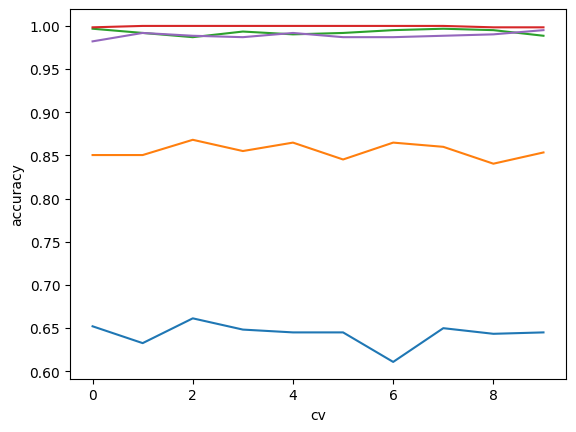

In [46]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

for mod in models:
    print(mod)
    data=cross_val_score(mod,X_Train,Y_train,cv=10)
    print(data)
    plt.plot(data)
    plt.xlabel('cv')
    plt.ylabel('accuracy')
    

